MINI PROJECT


In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
male = "/content/drive/MyDrive/data/S_02_voice/S_02/multiple_sentences/S_02_4001_VE1.wav"

In [ ]:
ipd.Audio(male)

In [ ]:
male, sr = librosa.load(male)

Text(0.5, 1.0, 'Male')

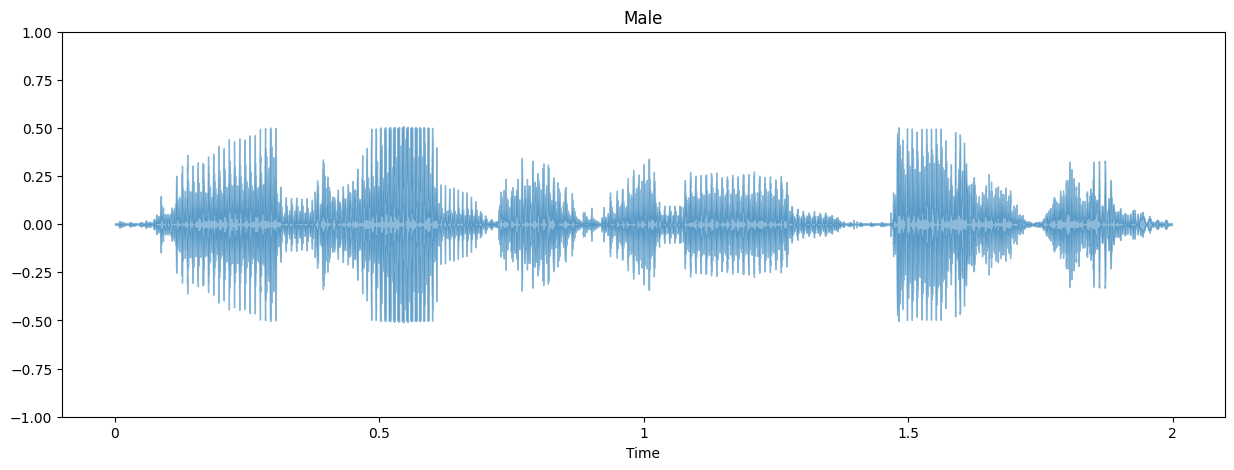

In [ ]:
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(male, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Male")

In [ ]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)

    plt.figure(figsize=(18, 5))

    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)

    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

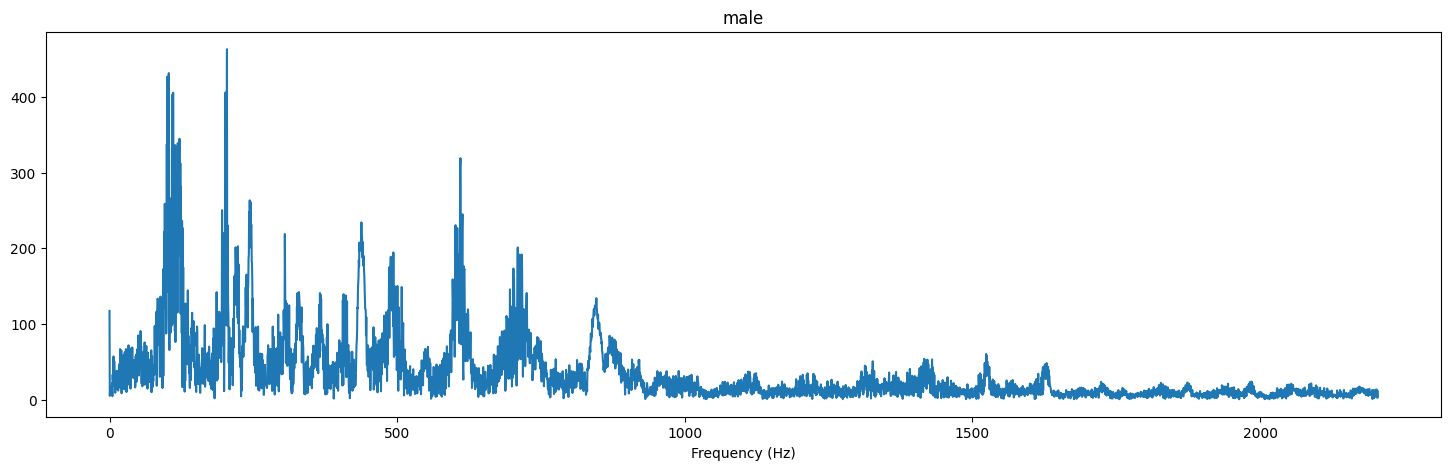

In [ ]:
plot_magnitude_spectrum(male, sr, "male", 0.1)

In [ ]:
FRAME_SIZE = 2048
HOP_SIZE = 512
S_scale = librosa.stft(male, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_scale.shape

(1025, 87)

In [ ]:
Y_scale = np.abs(S_scale) ** 2
Y_scale.shape


(1025, 87)

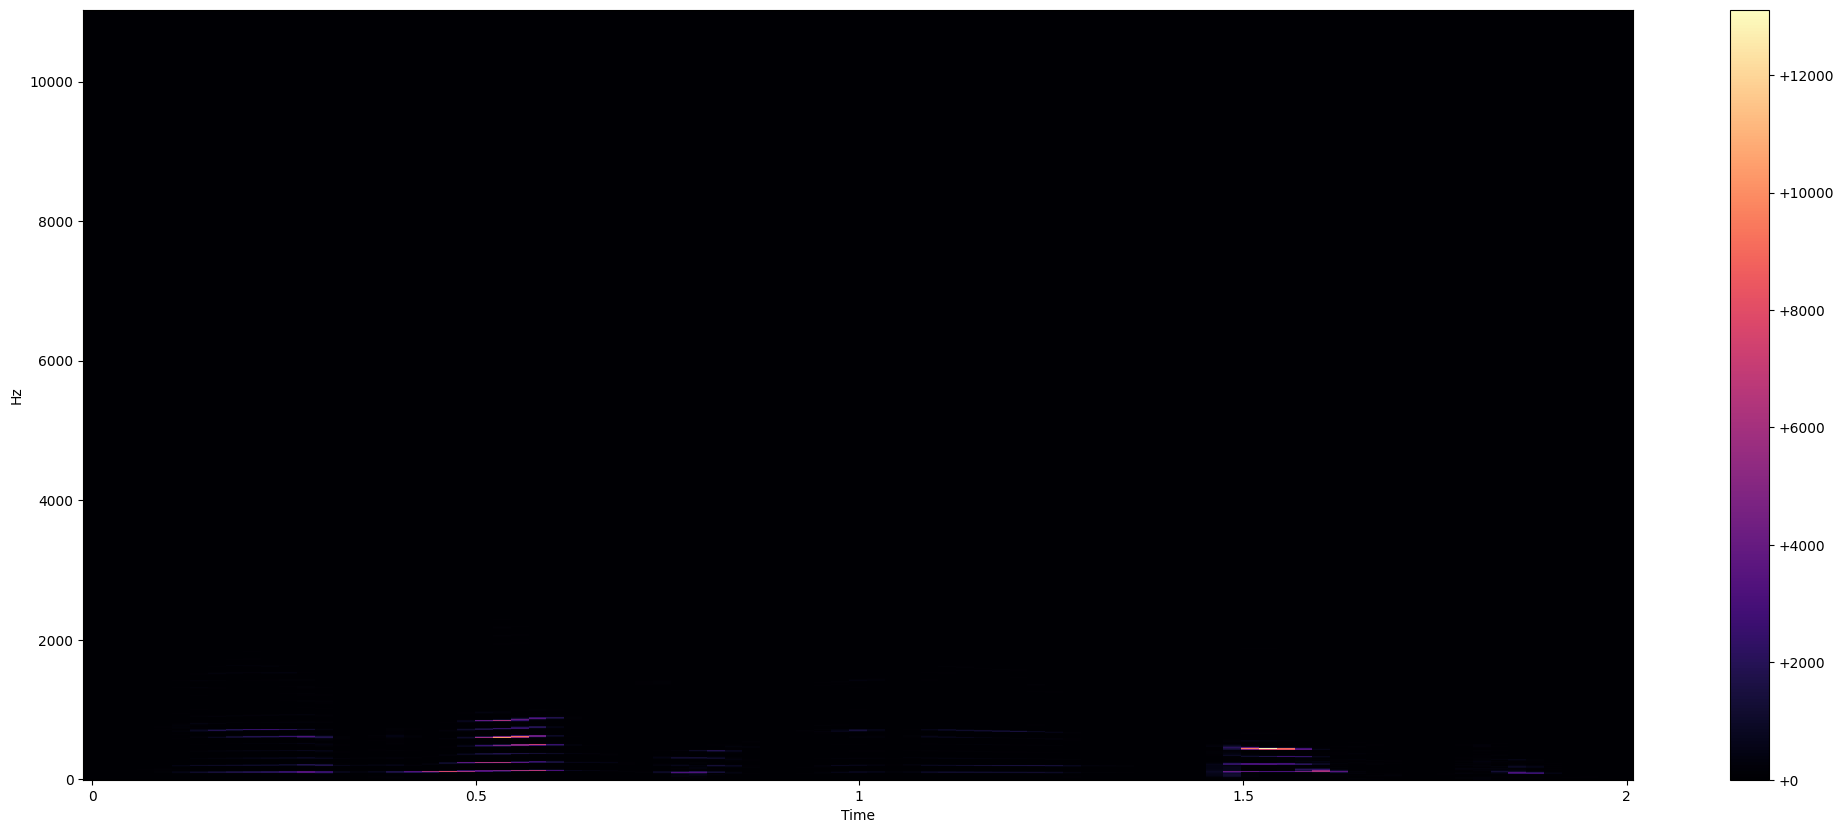

In [ ]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")
plot_spectrogram(Y_scale, sr, HOP_SIZE)

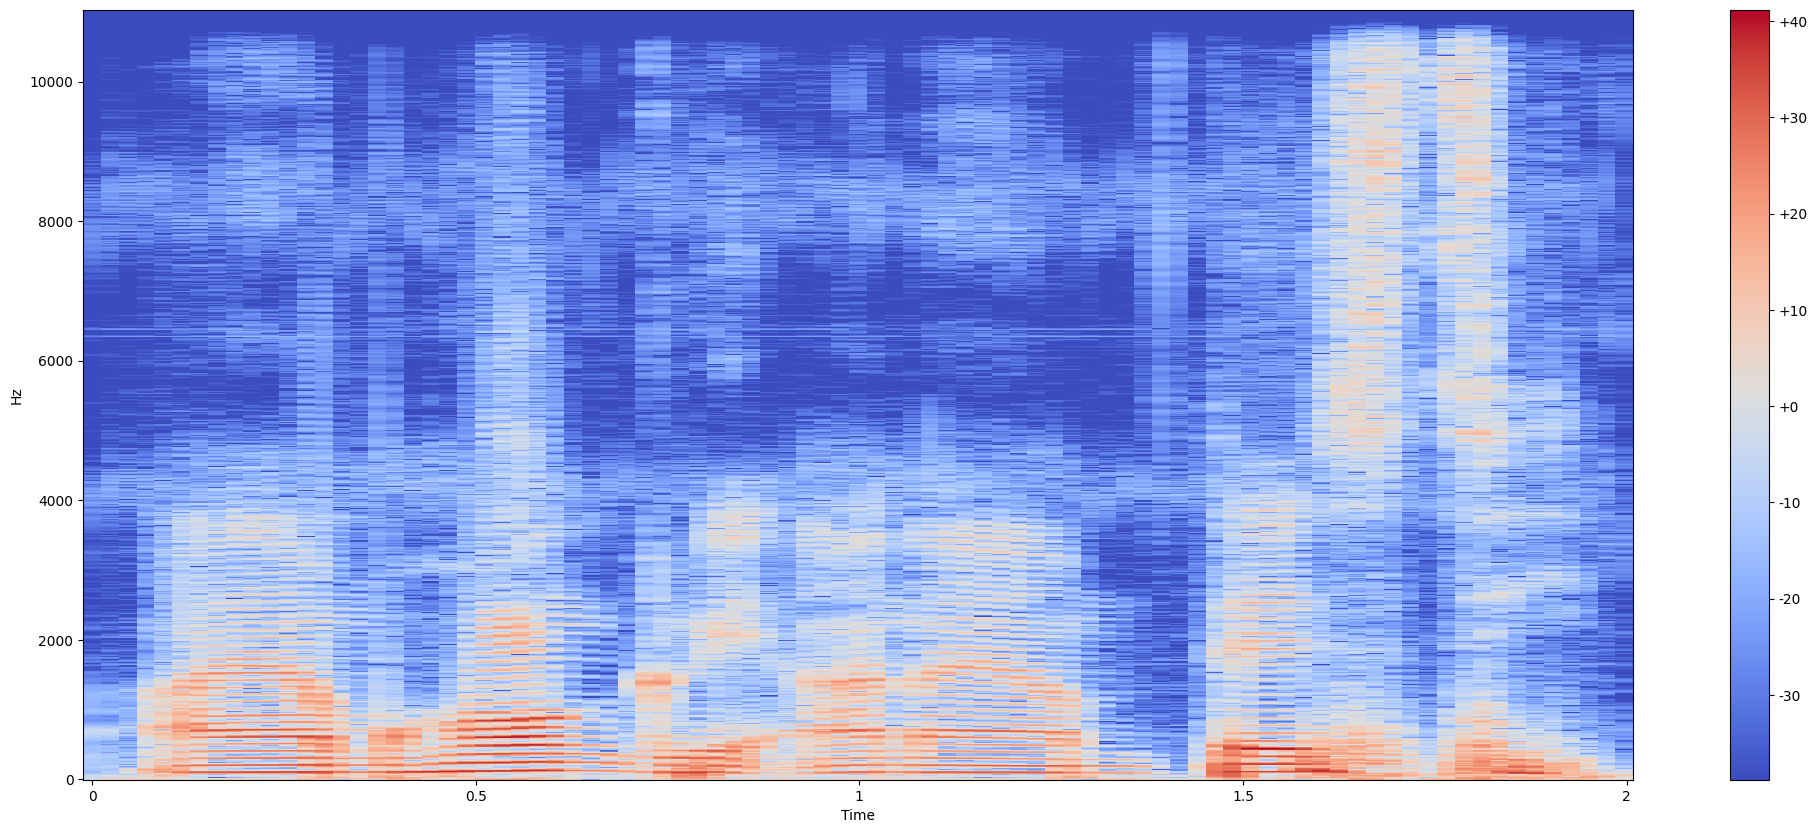

In [ ]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

In [ ]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
filter_banks.shape

(10, 1025)

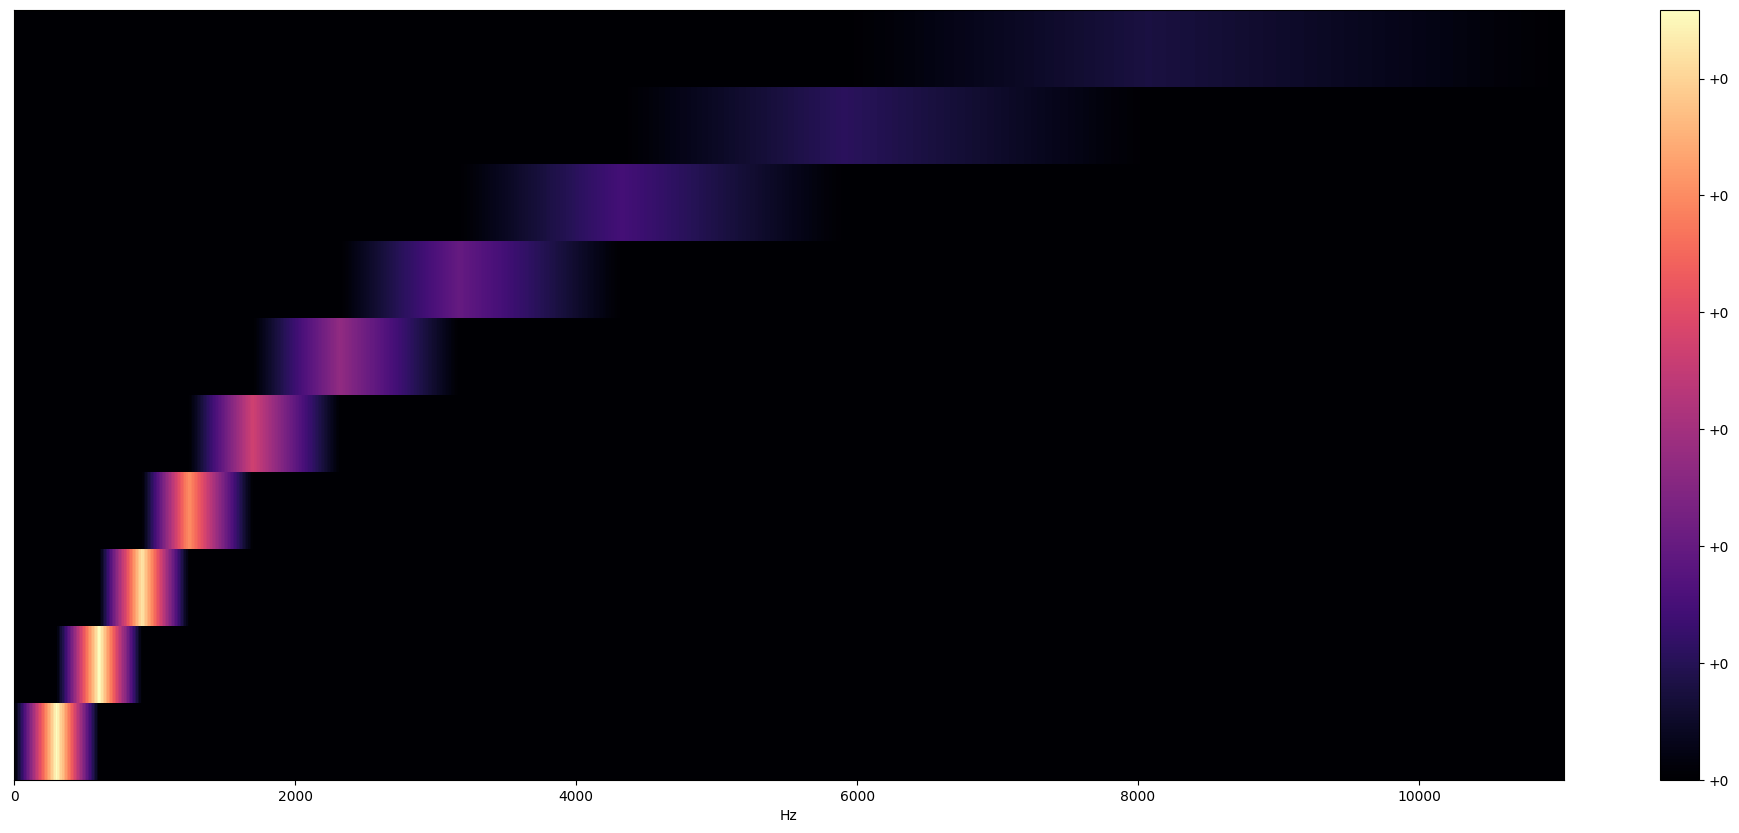

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks,
                         sr=sr,
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

In [ ]:
female = "/content/drive/MyDrive/data/S_02_voice/S_02/multiple_sentences/S_02_4033_VE2.wav"

In [ ]:
ipd.Audio(female)

In [ ]:
female, sr = librosa.load(female)

Text(0.5, 1.0, 'Female')

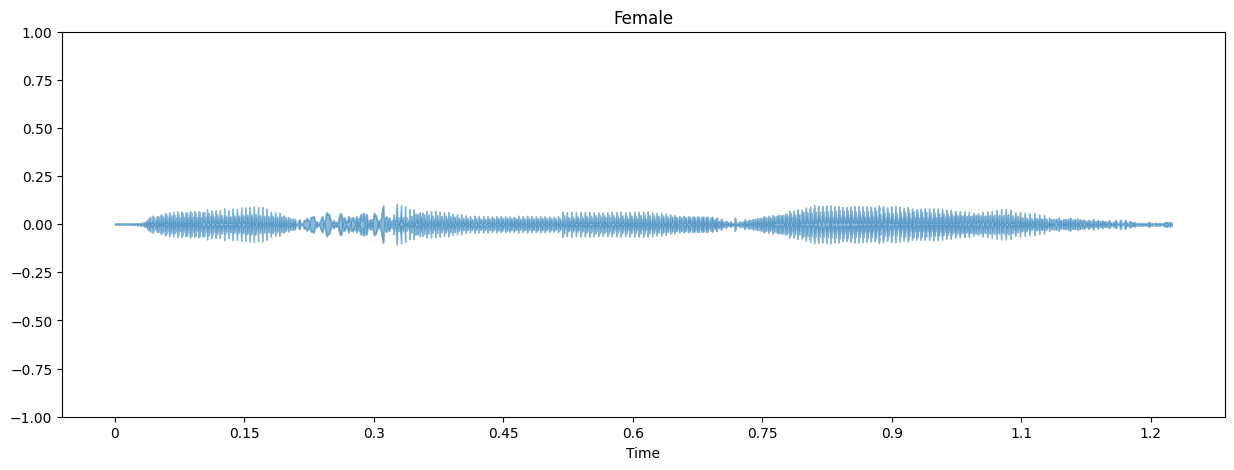

In [ ]:
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(female, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Female")

In [ ]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)

    plt.figure(figsize=(18, 5))

    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)

    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

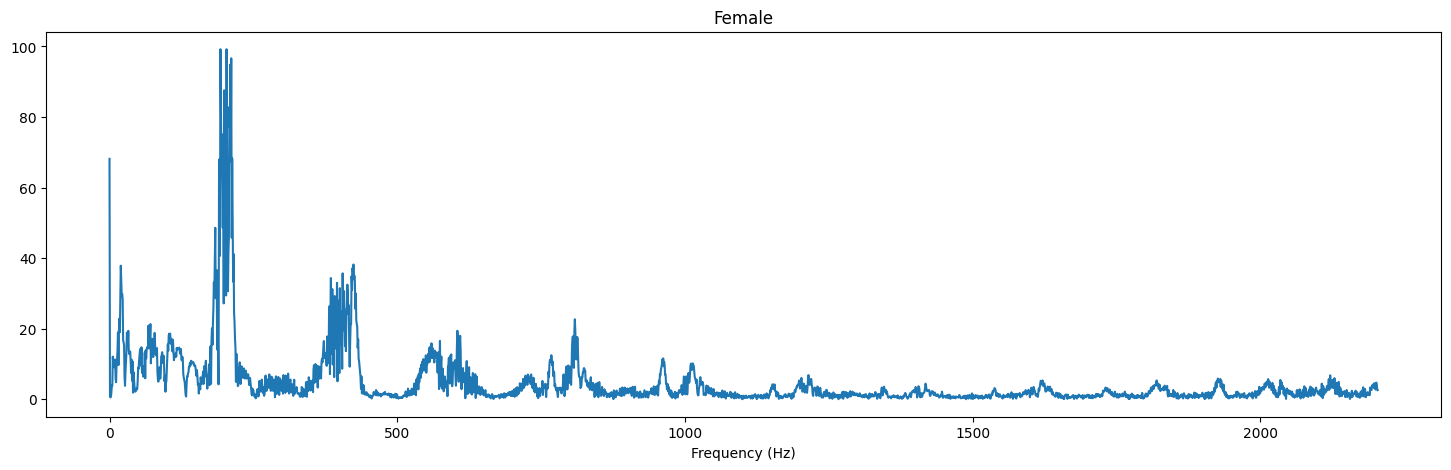

In [ ]:
plot_magnitude_spectrum(female, sr, "Female", 0.1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split
import numpy as np

# Mock data preparation (replace this with your actual dataset)
# X should contain your extracted audio features, and y should contain labels (0 for male, 1 for female)
X = np.random.rand(100, 10, 20)  # Example feature matrix with shape (100, 10, 20)
y = np.random.randint(2, size=100)  # Example labels (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build an RNN model
model = Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Save the trained model for future use
model.save('audio_gender_classification_model.h5')

Epoch 1/10
3/3 [==============================] - 3s 237ms/step - loss: 0.7552 - accuracy: 0.4250 - val_loss: 0.6789 - val_accuracy: 0.6500
Epoch 2/10
3/3 [==============================] - 0s 34ms/step - loss: 0.6762 - accuracy: 0.6250 - val_loss: 0.6831 - val_accuracy: 0.6000
Epoch 3/10
3/3 [==============================] - 0s 23ms/step - loss: 0.6673 - accuracy: 0.6125 - val_loss: 0.6908 - val_accuracy: 0.6000
Epoch 4/10
3/3 [==============================] - 0s 24ms/step - loss: 0.6569 - accuracy: 0.6125 - val_loss: 0.6961 - val_accuracy: 0.5500
Epoch 5/10
3/3 [==============================] - 0s 23ms/step - loss: 0.6424 - accuracy: 0.6500 - val_loss: 0.7022 - val_accuracy: 0.6000
Epoch 6/10
3/3 [==============================] - 0s 33ms/step - loss: 0.6322 - accuracy: 0.6625 - val_loss: 0.7061 - val_accuracy: 0.5500
Epoch 7/10
3/3 [==============================] - 0s 27ms/step - loss: 0.6199 - accuracy: 0.7125 - val_loss: 0.7100 - val_accuracy: 0.5500
Epoch 8/10
3/3 [==========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import librosa
import numpy as np

# Load and preprocess the new audio clip
new_audio_file = "/content/drive/MyDrive/data/multiple_sentences/multiple_sentences/S_01_4298_VV1.wav"  # Replace with the path to your new audio clip
sample_rate = 22050  # Specify the sample rate of your audio data
new_audio, sr = librosa.load(new_audio_file, sr=sample_rate)  # Load the audio with the specified sample rate
new_audio_features = np.random.rand(10, 20)  # Example feature matrix with shape (10, 20)

In [ ]:
# Make predictions using the trained RNN model
predictions = model.predict(np.expand_dims(new_audio_features, axis=0))  # Ensure the input shape matches the model's expectations

# Set a threshold for classification (e.g., 0.5)
threshold = 0.5

# Classify the prediction as male or female based on the threshold
if predictions > threshold:
    result = "female"
else:
    result = "male"

print(f"The predicted gender is: {result}")


1/1 [==============================] - 0s 24ms/step
The predicted gender is: female


In [ ]:
layers.Input(shape=(X_train.shape[1], X_train.shape[2]))


<KerasTensor: shape=(None, 10, 20) dtype=float32 (created by layer 'input_2')>

In [ ]:
# Assuming new_audio_features has a shape of (20,)
# Reshape it to (1, 10, 20) to match the model's input shape
new_audio_features = new_audio_features.reshape((1, 10, 20))

# Make predictions using the trained RNN model
predictions = model.predict(new_audio_features)


1/1 [==============================] - 0s 35ms/step


In [ ]:
# Make predictions using the trained RNN model
predictions = model.predict(new_audio_features)  # Replace with your extracted features

# Set a threshold for classification (e.g., 0.5)
threshold = 0.5

# Classify the predictions as male or female based on the threshold
predicted_labels = [1 if prediction > threshold else 0 for prediction in predictions]

# Assuming you have ground truth labels for the new data
# Load the ground truth labels for the new data
true_labels = [0, 1, 0, ...]  # Replace with your true labels

# Calculate the accuracy
accuracy = np.mean(np.array(predicted_labels) == np.array(true_labels))
print(f"Accuracy: {accuracy * 100:.2f}%")


1/1 [==============================] - 0s 95ms/step
Accuracy: 25.00%
